In [3]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
import pywt
import skimage
from skimage.restoration import denoise_tv_chambolle
from skimage.morphology import closing

ModuleNotFoundError: No module named 'skimage'

In [ ]:
lof =[]
for files in os.listdir("us_images"):
    if files.endswith('jpg'):
        lof.append(files)

print(len(lof))

84


In [ ]:
for files in lof:
    im = cv2.imread(os.path.join("us_images",files),0)
    c = 255 / np.log(1 + np.max(im)) 
    log_image = c * (np.log(im + 1))
    cv2.imwrite("log_transformed/{}".format(files),log_image.astype(np.uint8))

<ipython-input-5-5b0d4917250e>:4: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(im + 1))


In [ ]:
log_sample = cv2.imread('/content/log_transformed/09-42-05_2.jpg',0)

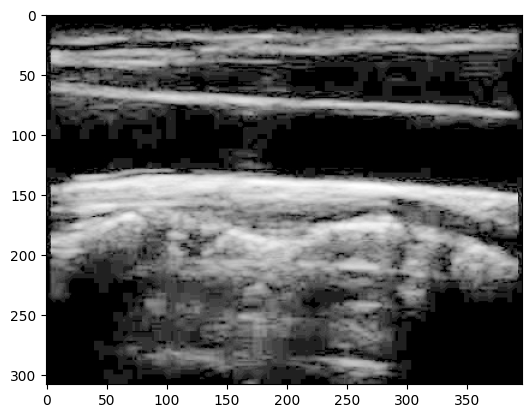

In [ ]:
plt.imshow(log_sample,cmap='gray')

In [ ]:
for file_im in os.listdir("log_transformed"):    
    if file_im.endswith('.jpg'):
        original= cv2.imread(os.path.join("log_transformed",files),0)
        
        coeffs2 = pywt.dwt2(original, 'db4')
        LL, (LH, HL, HH) = coeffs2
        lam=(np.median(abs(HH))/0.6745)+0.000001
        denoised_im = denoise_tv_chambolle(original, weight= (1/lam))
        cv2.imwrite("/content/wavelet_transformed/{}.jpg".format(file_im),denoised_im.astype(np.uint8))

In [ ]:
for file_im in os.listdir("log_transformed"):
    print(file_im)
    if file_im.endswith('.jpg'):
        original= cv2.imread(os.path.join("log_transformed",files),0)
        titles = ['Approximation', ' Horizontal detail',
                'Vertical detail', 'Diagonal detail']

        coeffs2 = pywt.dwt2(original, 'db4')
        LL, (LH, HL, HH) = coeffs2
        # fig = plt.figure(figsize=(12, 3))
        # for i, a in enumerate([LL, LH, HL, HH]):
        #     ax = fig.add_subplot(1, 4, i + 1)
        #     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        #     ax.set_title(titles[i], fontsize=10)
        #     ax.set_xticks([])
        #     ax.set_yticks([])

        # fig.tight_layout()
        # plt.show()

NameError: ignored

In [ ]:
# Wavelet transform of image, and plot approximation and details
for file_im in os.listdir("log_transformed"):
    print(file_im)
    if file_im.endswith('.jpg'):
        original= cv2.imread(os.path.join("log_transformed",files),0)
        titles = ['Approximation', ' Horizontal detail',
                'Vertical detail', 'Diagonal detail']

        coeffs2 = pywt.dwt2(original, 'db4')
        LL, (LH, HL, HH) = coeffs2
        # fig = plt.figure(figsize=(12, 3))
        # for i, a in enumerate([LL, LH, HL, HH]):
        #     ax = fig.add_subplot(1, 4, i + 1)
        #     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        #     ax.set_title(titles[i], fontsize=10)
        #     ax.set_xticks([])
        #     ax.set_yticks([])

        # fig.tight_layout()
        # plt.show()

        lam=(np.median(abs(HH))/0.6745)+0.000001
        denoised_im = denoise_tv_chambolle(original, weight= (1/lam))

        # Define the kernel for the closing operation
        kernel = np.ones((3, 3), np.uint8)

        # Perform closing on the grayscale image
        closed_img = cv2.morphologyEx(denoised_im, cv2.MORPH_CLOSE, kernel)

        median_filtered_img = cv2.medianBlur(cv2.convertScaleAbs(closed_img), 5)

        # denoised_img = cv2.fastNlMeansDenoising(median_filtered_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

        cv2.imwrite(f"output_images/{file_im}",255*median_filtered_img)



09-43-07_1.jpg
09-44-06_2.jpg
09-53-51_2.jpg
09-52-38_1.jpg
11-03-10.jpg
18-15-18.jpg
17-57-01.jpg
18-19-42.jpg
17-48-34.jpg
17-38-18.jpg
09-56-30_2.jpg
17-47-41.jpg
09-55-50.jpg
09-57-36_2.jpg
17-36-47.jpg
17-48-47.jpg
12-06-36.jpg
09-42-05_1.jpg
10-55-10.jpg
17-57-24.jpg
10-58-55.jpg
17-38-30.jpg
11-05-42.jpg
09-50-11_2.jpg
09-55-50_2.jpg
09-49-17_1.jpg
17-48-45.jpg
18-15-27.jpg
11-06-10.jpg
09-52-38_2.jpg
17-37-04.jpg
17-36-01.jpg
18-19-54.jpg
10-51-38.jpg
11-12-47.jpg
17-35-44.jpg
17-37-19.jpg
17-49-02.jpg
09-43-07_2.jpg
09-42-05_2.jpg
17-37-40.jpg
17-48-12.jpg
09-44-06_1.jpg
09-49-17_2.jpg
18-18-29.jpg
09-41-06_2.jpg
09-56-30.jpg
17-40-25.jpg
09-46-10_2.jpg
17-57-11.jpg
17-36-35.jpg
17-47-48.jpg
17-48-16.jpg
09-53-51.jpg
17-47-32.jpg
17-57-47.jpg
09-46-10_1.jpg
11-03-53.jpg
09-55-22_2.jpg
11-02-15.jpg
09-41-06_1.jpg
09-49-37_2.jpg
11-13-13.jpg
17-48-21.jpg
09-45-04_1.jpg
17-48-50.jpg
11-09-26.jpg
09-55-22.jpg
09-49-37_1.jpg
09-57-36.jpg
09-50-11_1.jpg
11-05-17.jpg
17-35-56.jpg
17-

In [ ]:
output = cv2.imread('/content/output_images/09-41-06_2.jpg',0)

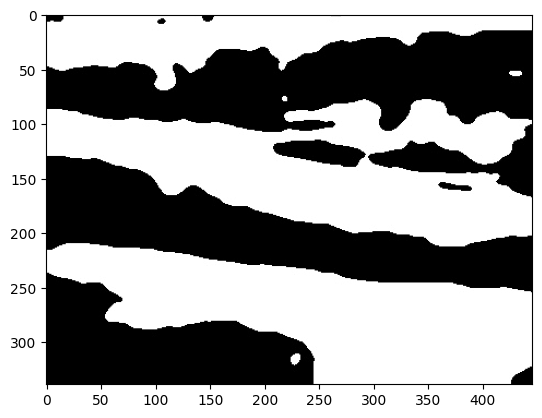

In [ ]:
plt.imshow(output, cmap = 'gray')